# Assignment 5 – Machine Learning in Python 

**Author**: Taylor Jacobs 
**Email**: Not-included per professor Freitas recommendation 
**Date**: 7/24/25 
**Environment**: See `environment.yml`  
**Description**:  
This notebook explores basic machine learning using [scikit-learn/caret/etc.], including data preparation, model training, and evaluation. This project is adapted from the Machine Learning Mastery group, the tutorial is titled "Your First Machine Learning Project in Python Step-By-Step" by Jason Brownlee

#### Background

Goals for this tutorial 

- Download and install python Scipy (we actually will add it to our environment5py.yml)
- Load a dataset and understand it's structure using statistical summaries and data visualization.
- Create machine learning models, choose the most ideal model and build confidence that the accuracy is reliable.

How to start machine learning in python? 

- Performing a project end-to-end is the best way to approach learning python
- Machine learning projects may not be linear but have well known steps:
1) Define the problem.
2) Prepare the data
3) Evaluate algorithms
4) Improve results
5) Present results

Hello World of Machine Learning

- The best project to start learning how to perform machine learning is through working on a new tool for classification of iris flowers. Using the iris dataset.

### Tutorial (Starts Here)

Overview:
1. Installing the python and Scipy platform.
2. Loading the iris dataset
3. Summarizing the dataset
4. Visualizing the dataset
5. Evaluating some algorithms
6. Making some predictions

### 1. Create a Conda Environment with Python SciPy
Creating a conda environment with Python and SciPy platform installed

#### 1.1 Install SciPy Libraries
This tutorial requires python version 2.7 or 3.6+

There are 5 key libraries (or added dependencies to your .yml file) needed to be installed in your environment, including:
 - scipy
 - numpy
 - matplotlib
 - pandas
 - sklearn

Install these using conda--> be sure to updat your yml file with environment updates.

#### 1.2 Start Jupyter and create a Jupyter Notebook to check Python and versions

Copy and paste the following, to check and ensure all libraries are downloaded and to know what versions are being used:

"#Check the versions of libraries
 
#Python version
import sys
print('Python: {}'.format(sys.version))

#scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

#numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

#matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

#pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))"



In [2]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:45:41) [GCC 13.3.0]
scipy: 1.15.3
numpy: 2.2.6
matplotlib: 3.10.3
pandas: 2.3.0
sklearn: 1.7.0


Ensure the read out has versions that are as up to date as the read-out below, if not you will need to update. If you recieve and error message troubleshoot now.

Python: 3.6.11 (default, Jun 29 2020, 13:22:26)
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
scipy: 1.5.2
numpy: 1.19.1
matplotlib: 3.3.0
pandas: 1.1.0
sklearn: 0.23.2

#### 2.1 Import Libraries 
We will import all the modules, functions and objects which will be used for this tutorial. 

Below we will perform the importation:

In [3]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### 2.2 Load Dataset 

Download the iris.csv file and upload it to you binder. 

- We will use pandas to load the data, provide descriptive statistics, and data visualization.

The data will be loaded below:

In [4]:
# Load dataset
url = "iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

### Summarize the Dataset

We will look at the data in a few different ways:
1) Evaluate the dimensions of the dataset
2) Display the data
3) Perform summary statistics
4) Breakdown the data by the class variable

#### 3.1 Dimensions of Dataset

We will see how many instances (rows) and how many attributes (columns) the data contains.

In [5]:
# shape
print(dataset.shape)

(150, 5)


150 instances and 5 attributes

#### 3.2 Peek at the Data 

We will evaluate the data set with labelled columns. 

In [6]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

This shows the first 20 rows of the data

#### Statistical Summary

We can summarize the data including count, mean, the min, the max and percentiles.
All values have the same scale (centimeters). 

In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### 3.4 Class Distribution

We will look at the number of instances (rows) that belong to each class. Below we will view the absolute counts:

In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### 3.5 Complete Example
Combining all of the previous examples below:

In [9]:
# summarize the data
from pandas import read_csv
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())


(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

### 4. Data Visualization

Below we will look at two different types of plots:
1) Univariate plots to better understand each attribute
2) Multivariate plots to better understand the relationships between attributes

#### 4.1 Univariate Plots
 - These are plots of each individual variable, given that the input variables are numeric- we can create box and whisker plots of each variable.

Box and Whisker Plots:

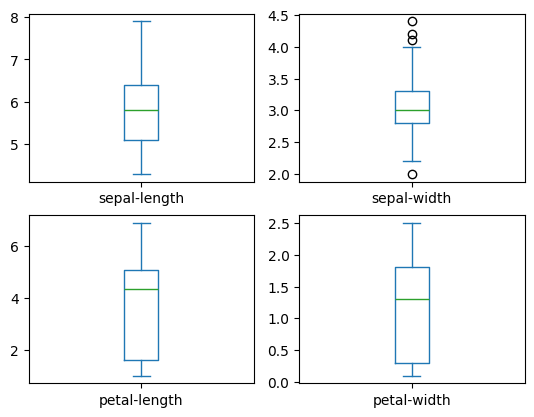

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Another way to visualize a single variable includes histograms

Histogram plots:

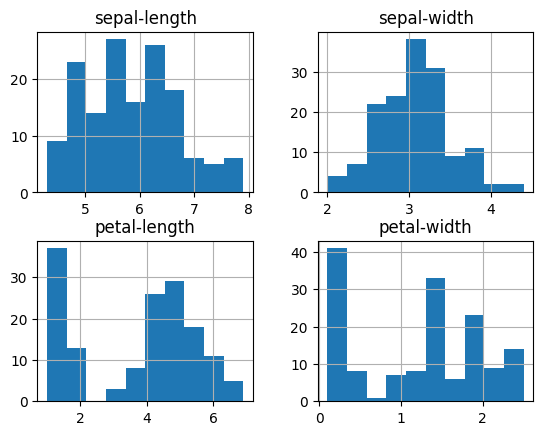

In [11]:
# histograms
dataset.hist()
pyplot.show()

### 4.2 Multivariate Plots

Now we look at interactions between the variables. We will look at scatterplots of all pairs of attributes. 

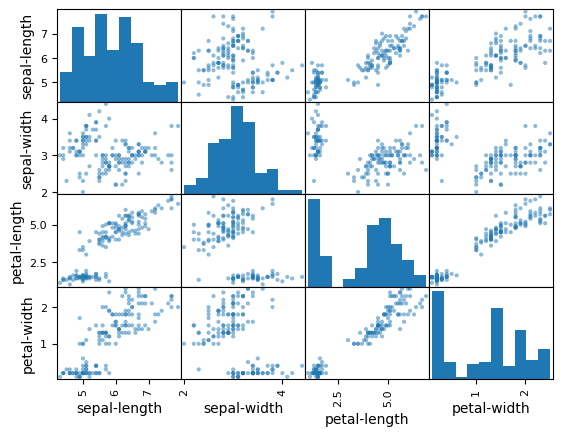

In [12]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

### 4.3 Complete Example

Below we will combine, generation of both types of plots:

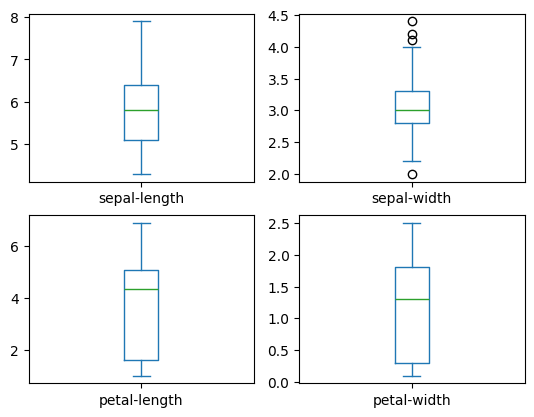

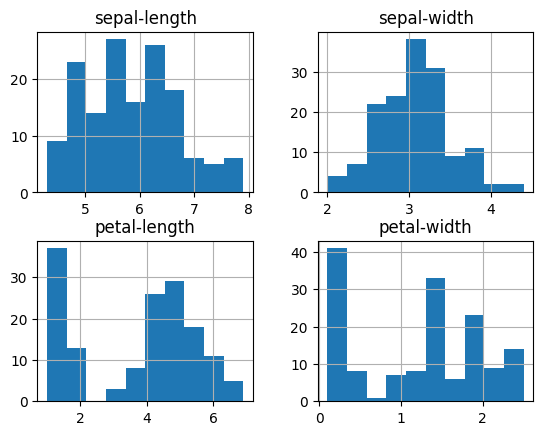

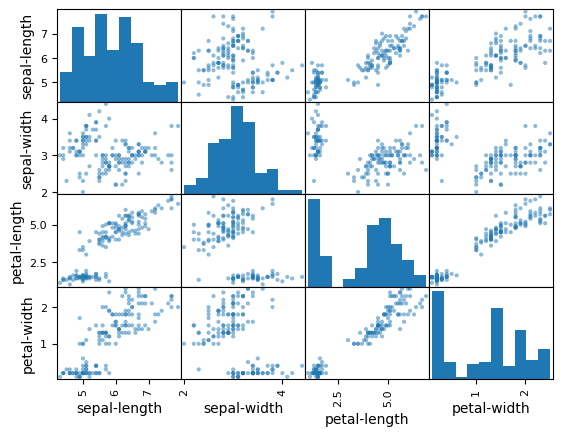

In [13]:
# visualize the data
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()


### 5. Evaluate Some Algorithms

We will create models of the data and estimate their accuracy on unseen data.

Overview:
1) Separate out a validation dataset
2) Set-up the test harness to use 10-fold cross validation
3) Build multiple different models to predict species from flower measurements
4) Select the best model of the data.

#### 5.1 Create a Validation Dataset 

Performing this task will help us identify if the model we are using is useful in analyzing our data.

We will later use statistical methods to create more concrete estimates of accuracy of the best model on the unseen data.

We will split the data into two so we can train and then test the model
    - Therefore 80% of the data will be used to train, evaluate and select our models and then 20% we will save to perform validation testing.

Below we will split out our validation dataset:

In [14]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Here we used python slice to select the columns in the NumPy array.

In doing this we have created data *X_train* and *Y_train* for preparing models and *X_validation* and *Y_validation* sets which can be used later. 

#### 5.2 Test Harness

In this section we will now perform a stratified 10-fold cross validation estimate of model accuracy.

We will split our data set into 10 parts, train on 9 parts and test on 1-- this will be replicated for all combinations of train-test splits.

Stratified-Each fold or split of the dataset will aim to have the same distribution of example by class as it exists in the whole training dataset.

We will set the random seed via a *random_state* arguent to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

We will then measure the accuracy of the model.

#### 5.3 Build Models 

Here we will see which algorithms are good for this problem. We can get idea which one is best from the plots based on their distribution

We will test the following algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)

This represents a mixture of simple linear and non-linear algorithms.

Below we will build and evaluate our models:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

This will be performed individually

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)


/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this wa

In [23]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.975000 (0.038188)


In [24]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.958333 (0.041667)


In [25]:
# Spot Check Algorithms
models = []
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

CART: 0.941667 (0.038188)


In [26]:
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.950000 (0.055277)


In [27]:
# Spot Check Algorithms
models = []
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models: 
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.983333 (0.033333)


In [33]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:  
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this wa

/tmp/slurmtmp.1842186/ipykernel_3094495/1119442617.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


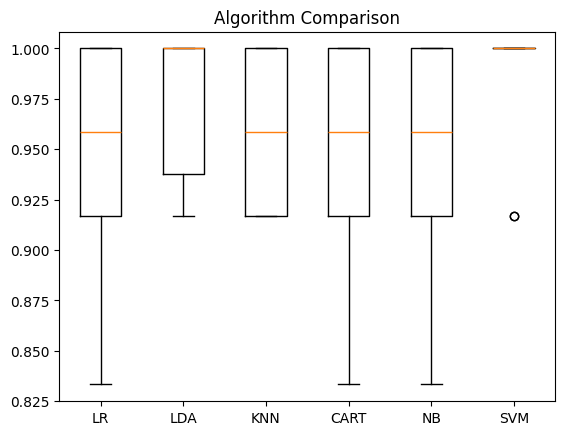

In [34]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

 It appears that Support Vector Machines (SVM) has the largest estimated accuracy at 98%
 Above we made box and whisker plots for each distribution.

 #### 5.5 Complete Example 

 We will tie this all together below into a single script:

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/users/PAS2797/thjacobs94/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this wa

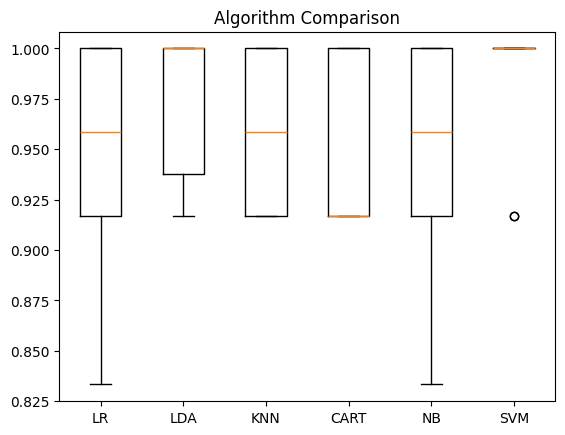

In [35]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### 6. Make Predictions

Because SVM was the best performing model we will use this for our final model. We will be assessing the accuracy of our model in our validation set. 

#### 6.1 Make Predictions

We can fit the model on the entrie validation dataset, as below:



In [36]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

#### 6.2 Evaluate Predictions

We can evaluate the predictions by comparing them to expected results in the validation set, then calculate accuracy. Then generate a confusion matrix and classification report. 



In [38]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Accuracy was 97%
The Classification report provides a breakdown of each class precision, recall, f1-score and support showing excellent results.


#### 6.3 Complete Example

Below we bring all of the elements together in a single script:


In [39]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## References

"Your First Machine Learning Project in Python Step-By-Step" by Jason Brownlee. https://machinelearningmastery.com/machine-learning-in-python-step-by-step